In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df_colesterol = pd.read_csv('./datasets/1701111759794-attachment.csv')

In [12]:
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         996 non-null    object 
 1   fumante                 997 non-null    object 
 2   nivel_atividade_fisica  996 non-null    object 
 3   idade                   997 non-null    float64
 4   peso                    997 non-null    float64
 5   altura                  997 non-null    float64
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(4), object(3)
memory usage: 54.8+ KB


In [10]:
# Remover coluna ID

df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

In [11]:
# Renomear as Colunas
df_colesterol.columns= [
    'grupo_sanguineo',
    'fumante',
    'nivel_atividade_fisica',
    'idade',
    'peso',
    'altura',
    'nivel_colesterol'
]

In [13]:
# Copiar DF para DF EDA
df_colesterol_eda = df_colesterol.copy()

In [14]:
# Copiar DF para DF Bucketing
df_colesterol_bucketing = df_colesterol.copy()

# EDA

In [15]:
#Visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [16]:
df_colesterol_eda.grupo_sanguineo.unique()

array(['B', 'A', 'O', 'AB', nan], dtype=object)

In [17]:
df_colesterol_eda.fumante.unique()

array(['Sim', 'Não', nan], dtype=object)

In [18]:
df_colesterol_eda.nivel_atividade_fisica.unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [28]:
# Detectar valores ausentes
df_colesterol_eda.isna().sum()

grupo_sanguineo           0
fumante                   0
nivel_atividade_fisica    0
idade                     0
peso                      0
altura                    0
nivel_colesterol          0
dtype: int64

In [21]:
# Medidas estatísticas do DF
df_colesterol_eda.describe()

,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


In [22]:
# Coletar medidas das variáveis categóricas

moda_grupo_sang = df_colesterol_eda.grupo_sanguineo.mode()
moda_fumante = df_colesterol_eda.fumante.mode()
moda_nivel_atividade = df_colesterol_eda.nivel_atividade_fisica.mode()

In [24]:
# Coletar medidas das variáveis numéricas

mediana_idade = df_colesterol_eda.idade.median()
mediana_peso = df_colesterol_eda.peso.median()
mediana_altura = df_colesterol_eda.altura.median()

In [27]:
# Inputar valores ausentes

df_colesterol_eda.fillna(
    value={
        'grupo_sanguineo': moda_grupo_sang[0],
        'fumante': moda_fumante[0],
        'nivel_atividade_fisica': moda_nivel_atividade[0],
        'idade': mediana_idade,
        'peso': mediana_peso,
        'altura': mediana_altura,
        },
    inplace=True
    )

In [29]:
# Convertendo dados numéricos float para int
df_colesterol_eda.idade = df_colesterol_eda.idade.astype(int)
df_colesterol_eda.altura = df_colesterol_eda.altura.astype(int)

In [37]:
# Estrutura do DF
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         963 non-null    object 
 1   fumante                 963 non-null    object 
 2   nivel_atividade_fisica  963 non-null    object 
 3   idade                   963 non-null    int64  
 4   peso                    963 non-null    float64
 5   altura                  963 non-null    int64  
 6   nivel_colesterol        963 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 60.2+ KB


In [31]:
# Visualização do DF
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


<Axes: xlabel='idade'>

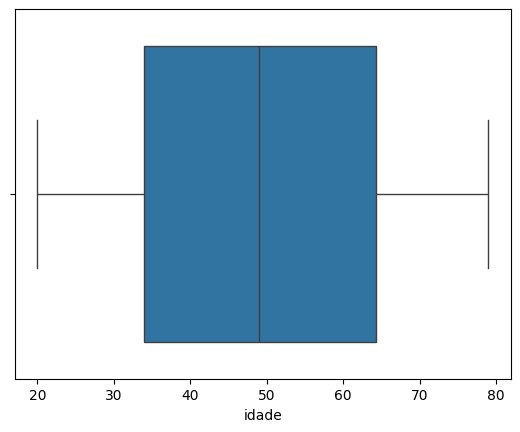

In [32]:
# Verificar / Detectar Outliers

sns.boxplot(data=df_colesterol_eda, x='idade')

<Axes: xlabel='peso'>

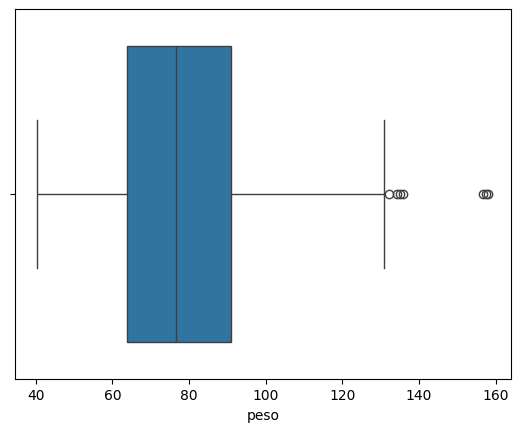

In [38]:
sns.boxplot(data=df_colesterol_eda, x='peso')

In [35]:
# Filtrar o publico a ser removido

df_colesterol_eda[df_colesterol_eda['peso'] < 40].peso.count()

np.int64(37)

In [36]:
# Remover publico com peso menor de 40kg do DF

df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda['peso'] < 40].index, axis=0, inplace=True)

<Axes: xlabel='altura'>

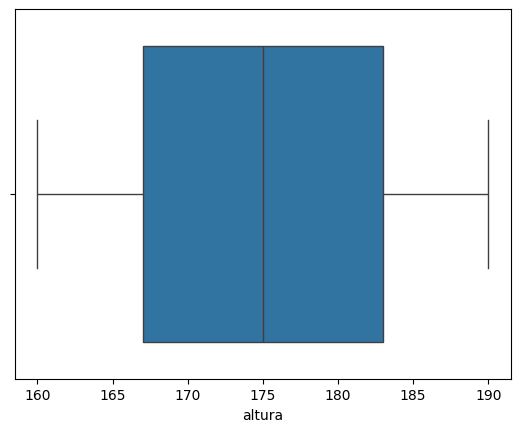

In [39]:
sns.boxplot(data=df_colesterol_eda, x='altura')

<Axes: xlabel='nivel_colesterol'>

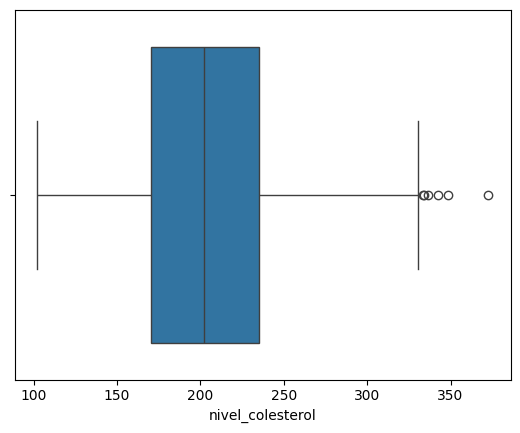

In [40]:
sns.boxplot(data=df_colesterol_eda, x='nivel_colesterol')